In [4]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

Import the libraries we need to use in this lab


In [5]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [6]:
# read the input data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
raw_data = pd.read_csv(url)
raw_data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


In [7]:
raw_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
count,41202.0,41202.000000,41202.000000,41202.000000,41202.000000,41202.000000,41202.000000,41202.0,41202.000000,41202.000000,41202.000000,41202.000000,41202.000000
mean,2.0,1.633926,18.384928,2.025411,0.999393,132.220475,164.546333,1.0,69.986150,0.491020,5.608198,0.999976,14.107666
std,0.0,0.924250,2.856605,0.461587,0.024625,7.726159,67.901529,0.0,6.184851,0.066404,2.979348,0.004927,5.030619
min,2.0,1.000000,0.000000,1.000000,0.000000,10.000000,3.000000,1.0,3.700000,0.000000,0.000000,0.000000,0.010000
25%,2.0,1.000000,17.370000,2.000000,1.000000,132.000000,113.000000,1.0,70.000000,0.500000,6.940000,1.000000,10.000000
50%,2.0,1.000000,18.180000,2.000000,1.000000,132.000000,163.000000,1.0,70.000000,0.500000,6.940000,1.000000,16.190000
75%,2.0,2.000000,19.380000,2.000000,1.000000,132.000000,231.000000,1.0,70.000000,0.500000,6.940000,1.000000,16.190000
max,2.0,8.000000,189.910000,5.000000,1.000000,264.000000,265.000000,1.0,199.700000,0.500000,57.000000,1.000000,98.000000


<Axes: >

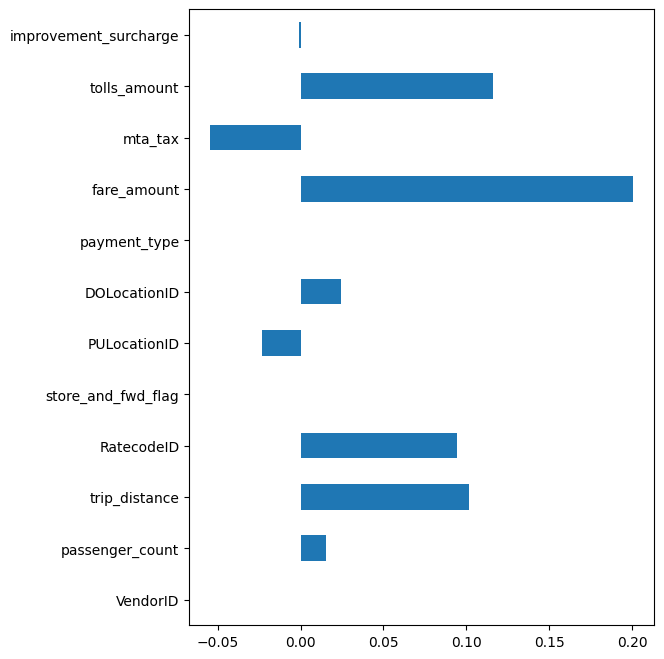

In [8]:
correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind='barh', figsize=(6, 8))

<Axes: >

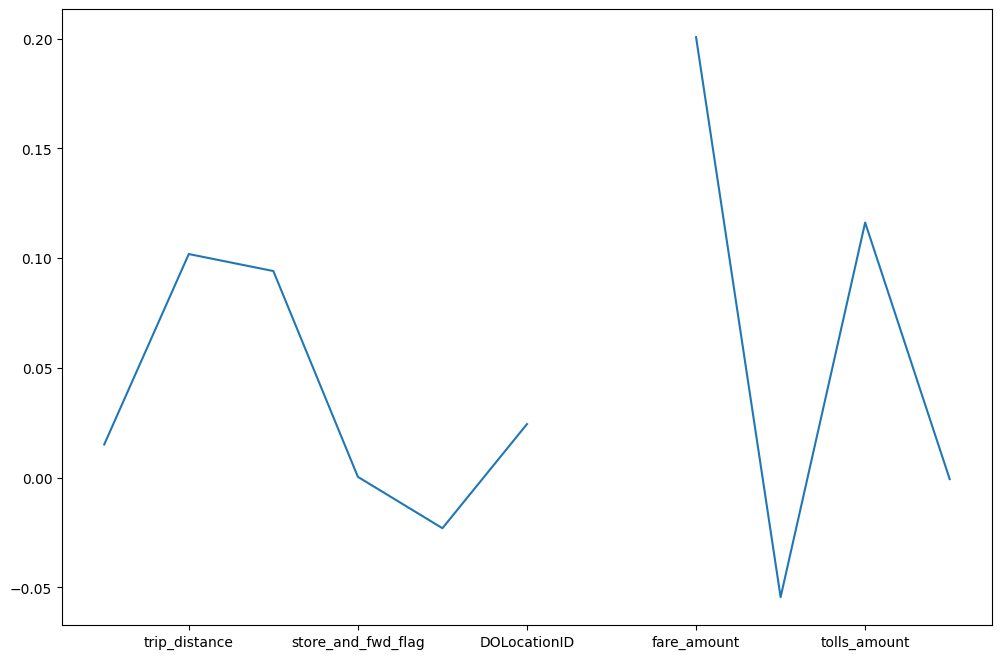

In [9]:

correlation_values = raw_data.corr()['tip_amount'].drop('tip_amount')
correlation_values.plot(kind = 'line', figsize= (12,8))

In [ ]:

y = raw_data[['tip_amount']].values.astype('float32')

proc_data = raw_data.drop(['tip_amount'], axis=1)

X = proc_data.values

X = normalize(X, axis=1, norm='l1', copy=False)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<div id="dt_sklearn">
    <h3>Decision Tree Regressor model with Scikit-Learn</h2>
</div>


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                               max_depth=8, 
                               random_state=35)

In [13]:
dt_reg.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,35
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [14]:
y_pred = dt_reg.predict(X_test)


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 24.55468765331435
R2 Score: 0.02789731673872531


In [ ]:
X_train = raw_data.drop('tip_amount', axis=1)  
y_train = raw_data['tip_amount']


In [34]:
from sklearn.tree import export_text
tree_rules = export_text(dt_reg, feature_names=list(X_train.columns))
print(tree_rules)


|--- fare_amount <= 0.13
|   |--- fare_amount <= 0.10
|   |   |--- fare_amount <= 0.06
|   |   |   |--- passenger_count <= 0.01
|   |   |   |   |--- PULocationID <= 0.35
|   |   |   |   |   |--- trip_distance <= 0.01
|   |   |   |   |   |   |--- trip_distance <= 0.01
|   |   |   |   |   |   |   |--- fare_amount <= 0.04
|   |   |   |   |   |   |   |   |--- value: [3.57]
|   |   |   |   |   |   |   |--- fare_amount >  0.04
|   |   |   |   |   |   |   |   |--- value: [5.29]
|   |   |   |   |   |   |--- trip_distance >  0.01
|   |   |   |   |   |   |   |--- fare_amount <= 0.06
|   |   |   |   |   |   |   |   |--- value: [10.00]
|   |   |   |   |   |   |   |--- fare_amount >  0.06
|   |   |   |   |   |   |   |   |--- value: [5.53]
|   |   |   |   |   |--- trip_distance >  0.01
|   |   |   |   |   |   |--- value: [3.00]
|   |   |   |   |--- PULocationID >  0.35
|   |   |   |   |   |--- passenger_count <= 0.00
|   |   |   |   |   |   |--- mta_tax <= 0.00
|   |   |   |   |   |   |   |--- impro

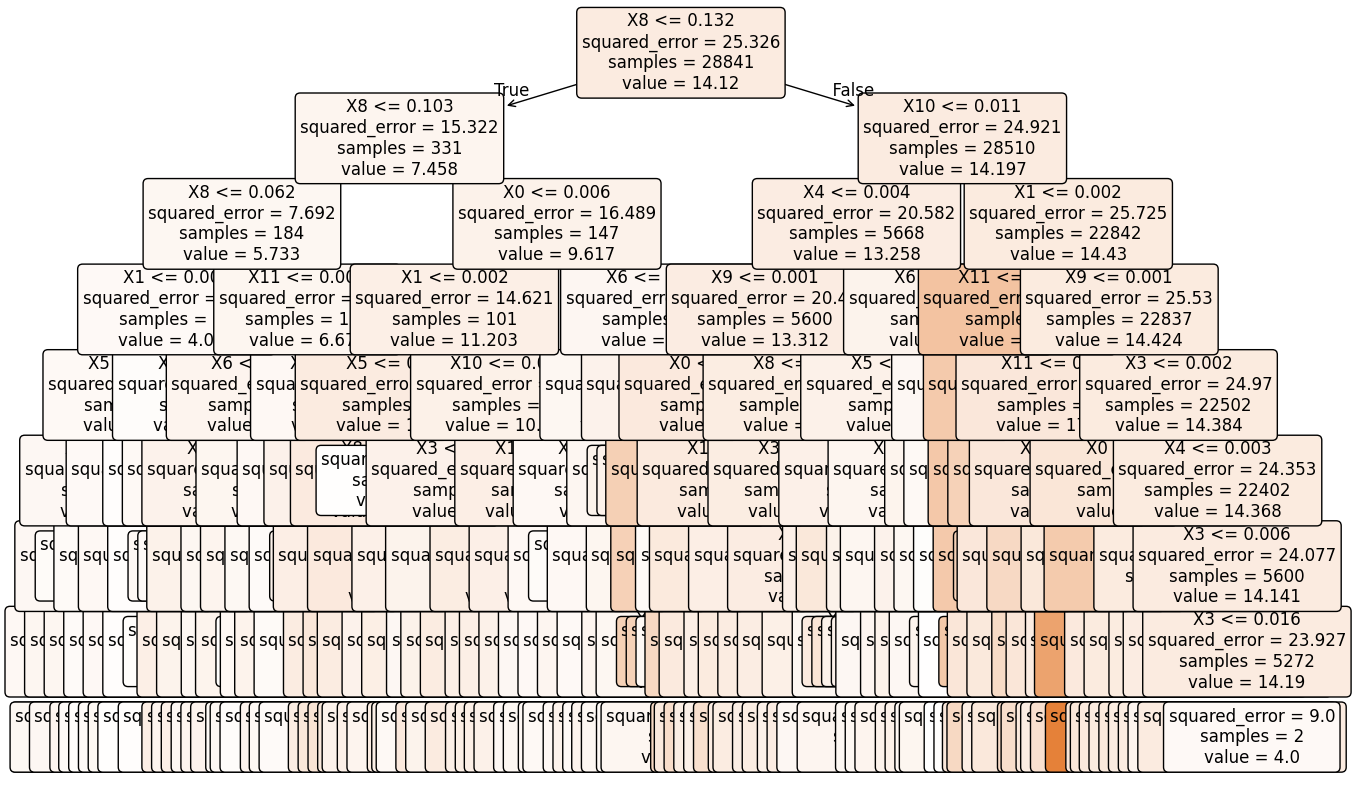

In [19]:
import matplotlib.pyplot as plt
from sklearn import tree

n_features = X_train.shape[1]                  
feature_names = [f"X{i}" for i in range(n_features)] 

plt.figure(figsize=(15,10))
tree.plot_tree(dt_reg,
               feature_names=feature_names,
               filled=True,
               rounded=True,
               fontsize=12)
plt.show()


In [20]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


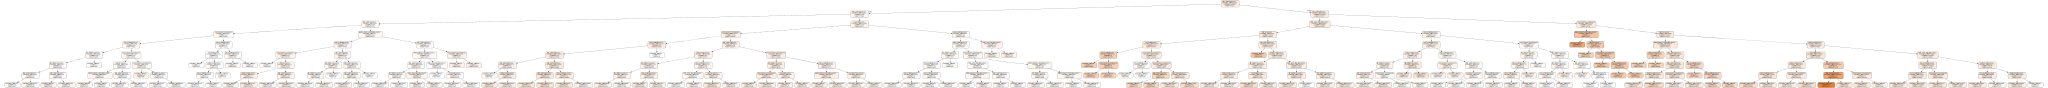

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_reg, out_file=None, 
                           feature_names=X_train.columns,
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  
graph


<div id="dt_sklearn_snapml">
    <h2>Evaluation</h2>
</div>


In [ ]:

y_pred = dt_reg.predict(X_test)

mse_score = mean_squared_error(y_test, y_pred)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = dt_reg.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 24.555
R^2 score : 0.028


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = dt_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R2 score: {r2:.3f}")


MSE: 24.555
MAE: 3.607
R2 score: 0.028


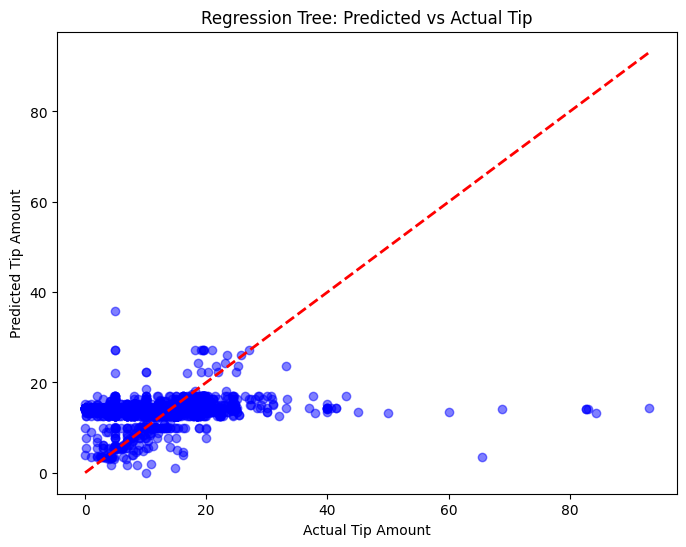

In [ ]:
import matplotlib.pyplot as plt

y_pred = dt_reg.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  
plt.xlabel("Actual Tip Amount")
plt.ylabel("Predicted Tip Amount")
plt.title("Regression Tree: Predicted vs Actual Tip")
plt.show()


In [41]:
features = list(X_train.columns)
importances = dt_reg.feature_importances_

for f, imp in zip(features, importances):
    print(f"{f}: {imp:.3f}")


VendorID: 0.089
passenger_count: 0.096
trip_distance: 0.023
RatecodeID: 0.080
store_and_fwd_flag: 0.034
PULocationID: 0.021
DOLocationID: 0.031
payment_type: 0.000
fare_amount: 0.356
mta_tax: 0.064
tolls_amount: 0.186
improvement_surcharge: 0.021


In [ ]:
import pandas as pd

df_features = pd.DataFrame(X_train, columns=features)
df_features['tip_amount'] = y_train

corr = df_features.corr()
print(corr['tip_amount'].sort_values(ascending=False))


tip_amount               1.000000
fare_amount              0.200638
tolls_amount             0.116172
trip_distance            0.101819
RatecodeID               0.094075
DOLocationID             0.024348
passenger_count          0.015081
store_and_fwd_flag       0.000320
improvement_surcharge   -0.000727
PULocationID            -0.023086
mta_tax                 -0.054488
VendorID                      NaN
payment_type                  NaN
Name: tip_amount, dtype: float64


In [ ]:
import pandas as pd

# User inputs
VendorID = int(input("Enter Vendor ID (1 or 2): "))
passenger_count = int(input("Enter Passenger Count: "))
trip_distance = float(input("Enter Trip Distance (in miles): "))
RatecodeID = int(input("Enter RatecodeID: "))
store_and_fwd_flag = int(input("Enter store_and_fwd_flag (0=No, 1=Yes): "))
PULocationID = int(input("Enter Pickup Location ID: "))
DOLocationID = int(input("Enter Dropoff Location ID: "))
payment_type = int(input("Enter Payment Type (1=Credit, 2=Cash, etc.): "))
fare_amount = float(input("Enter Fare Amount ($): "))
mta_tax = float(input("Enter MTA Tax ($): "))
tolls_amount = float(input("Enter Tolls Amount ($): "))
improvement_surcharge = float(input("Enter Improvement Surcharge ($): "))


custom_input = pd.DataFrame([[
    VendorID, passenger_count, trip_distance, RatecodeID,
    store_and_fwd_flag, PULocationID, DOLocationID, payment_type,
    fare_amount, mta_tax, tolls_amount, improvement_surcharge
]], columns=X_train.columns)

# Prediction
prediction = dt_reg.predict(custom_input)
print(f"Predicted Tip Amount: ${prediction[0]:.2f}")


Enter Vendor ID (1 or 2):  1
Enter Passenger Count:  2
Enter Trip Distance (in miles):  9.8
Enter RatecodeID:  2
Enter store_and_fwd_flag (0=No, 1=Yes):  0
Enter Pickup Location ID:  134
Enter Dropoff Location ID:  132
Enter Payment Type (1=Credit, 2=Cash, etc.):  1
Enter Fare Amount ($):  29.7
Enter MTA Tax ($):  0.54
Enter Tolls Amount ($):  3.0
Enter Improvement Surcharge ($):  0.32


Predicted Tip Amount: $13.88
